<a href="https://colab.research.google.com/github/khalidme94/SDA_Final_Project/blob/main/final_project_V0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

###Reading the dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/Final Project/English_Saudi Social Bank Data 2015-2020.csv')

##EDA

###Data Exploration

In [3]:
df.tail()

,bank_branch,loan_type,loan_classification,customer_sector,loan_value,installment,gender,age,social_status,special_needs,family_members,saving_loan,income_value,Year,Month
736678,Hail,Individual,Private,Undefined,30000.0,< 1000,FEMALE,< 30,Divorced,No,< 02,No,< 5000,2020,2
736679,KhamisMishiat,Individual,Marrage,Undefined,60000.0,>= 1000,MALE,< 30,Married,No,>= 02,No,< 5000,2020,1
736680,Jeddah,Individual,Marrage,Govrenment_Employee,60000.0,>= 1000,MALE,< 30,Married,No,>= 02,No,>= 10000,2020,1
736681,AlMajmaah,Individual,Marrage,Undefined,60000.0,>= 1000,MALE,>= 30,Married,No,>= 02,Yes,< 5000,2020,1
736682,Madinah,Individual,Family,Undefined,24000.0,< 1000,FEMALE,>= 60,Widower,No,>= 02,No,< 5000,2020,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736683 entries, 0 to 736682
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bank_branch          736683 non-null  object 
 1   loan_type            736683 non-null  object 
 2   loan_classification  736683 non-null  object 
 3   customer_sector      497463 non-null  object 
 4   loan_value           736683 non-null  float64
 5   installment          736683 non-null  object 
 6   gender               736683 non-null  object 
 7   age                  731346 non-null  object 
 8   social_status        736683 non-null  object 
 9   special_needs        736683 non-null  object 
 10  family_members       735871 non-null  object 
 11  saving_loan          736683 non-null  object 
 12  income_value         710276 non-null  object 
 13  Year                 736683 non-null  int64  
 14  Month                736683 non-null  int64  
dtypes: float64(1), in

In [5]:
df.isnull().sum()

bank_branch                 0
loan_type                   0
loan_classification         0
customer_sector        239220
loan_value                  0
installment                 0
gender                      0
age                      5337
social_status               0
special_needs               0
family_members            812
saving_loan                 0
income_value            26407
Year                        0
Month                       0
dtype: int64

In [6]:
max(df.loan_value)

4000000.0

In [7]:
min(df.loan_value)

2750.0

In [8]:
df[df.loan_value>=1000000]

,bank_branch,loan_type,loan_classification,customer_sector,loan_value,installment,gender,age,social_status,special_needs,family_members,saving_loan,income_value,Year,Month
3233,AlKharj,Project,VIP,NaN,1000000.0,>= 1000,MALE,>= 40,Married,No,< 02,No,< 5000,2015,6
10998,Hail,Project,VIP,NaN,2250739.0,>= 1000,MALE,>= 60,Married,No,>= 10,No,< 5000,2015,1
12762,Hail,Project,VIP,NaN,1092500.0,>= 1000,MALE,>= 30,Single,No,NaN,No,NaN,2015,5
16421,AlKharj,Project,VIP,Govrenment_Retired,1206110.0,>= 1000,MALE,>= 40,Married,No,>= 05,No,NaN,2015,1
18868,AlKharj,Project,VIP,NaN,2394000.0,>= 1000,MALE,>= 30,Married,No,>= 02,No,NaN,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729957,Makkah,Business,VIP,Undefined,4000000.0,>= 1000,MALE,>= 40,Married,No,< 02,No,>= 10000,2020,2
729966,WadiAldawasir,Business,VIP,Undefined,1076000.0,>= 1000,FEMALE,>= 30,Single,No,< 02,No,< 5000,2020,3
731709,Najran,Business,VIP,Govrenment_Retired,2468000.0,>= 1000,MALE,>= 40,Married,No,< 02,No,>= 10000,2020,1
732309,Najran,Business,VIP,Undefined,4000000.0,>= 1000,MALE,>= 60,Married,No,< 02,No,>= 10000,2020,2


In [9]:
df.shape

(736683, 15)

In [10]:
equal60=pd.DataFrame(df[df.loan_value==60000]).loan_value.count()
print(f'there are {equal60} records that loan value equals 60,000 that represent %{(equal60/df.shape[0])*100}')

there are 662603 records that loan value equals 60,000 that represent %89.94411436126529


In [11]:
over60=pd.DataFrame(df[df.loan_value>60000]).loan_value.count()
print(f'there are {over60} records that loan value over 60,000 that represent %{(over60/df.shape[0])*100}')

there are 15166 records that loan value over 60,000 that represent %2.058687386569257


In [12]:
under60=pd.DataFrame(df[df.loan_value<60000]).loan_value.count()
print(f'there are {under60} records that loan value under 60,000 that represent %{(under60/df.shape[0])*100}')

there are 58914 records that loan value under 60,000 that represent %7.997198252165449


Most Frequent values of Age, Family Members and Income Value

In [13]:
#Most Frequent values of Age
fage=pd.DataFrame(df.age.value_counts()).index[0]
fage

'>= 30'

In [14]:
#Most Frequent values of Family Members
ffamily=pd.DataFrame(df.family_members.value_counts()).index[0]
ffamily

'>= 02'

In [15]:
#Most Frequent values of Income Value
fincome=pd.DataFrame(df.income_value.value_counts()).index[0]
fincome

'< 5000'

In [16]:
df1=df.copy()

In [17]:
df1.loc[df1.loan_value==60000,'loan_value_area']='60K SAR'
df1.loc[df1.loan_value>60000,'loan_value_area']='Over 60K SAR'
df1.loc[df1.loan_value<60000,'loan_value_area']='Under 60K SAR'

In [18]:
print(pd.DataFrame(df1[df1.loan_value_area=='Over 60K SAR'].loan_value).describe())

         loan_value
count  1.516600e+04
mean   2.044600e+05
std    2.427588e+05
min    6.004500e+04
25%    1.130000e+05
50%    1.800000e+05
75%    2.230000e+05
max    4.000000e+06


In [19]:
print(pd.DataFrame(df1[df1.loan_value_area=='Under 60K SAR'].loan_value).describe())

         loan_value
count  58914.000000
mean   37101.473453
std    10847.333879
min     2750.000000
25%    30000.000000
50%    36000.000000
75%    48000.000000
max    59750.000000


In [20]:
print(pd.DataFrame(df1[df1.loan_value_area=='60K SAR'].loan_value).describe())

       loan_value
count    662603.0
mean      60000.0
std           0.0
min       60000.0
25%       60000.0
50%       60000.0
75%       60000.0
max       60000.0


In [21]:
df1.loan_value_area.value_counts(normalize=True)

60K SAR          0.899441
Under 60K SAR    0.079972
Over 60K SAR     0.020587
Name: loan_value_area, dtype: float64

###Data Visualization

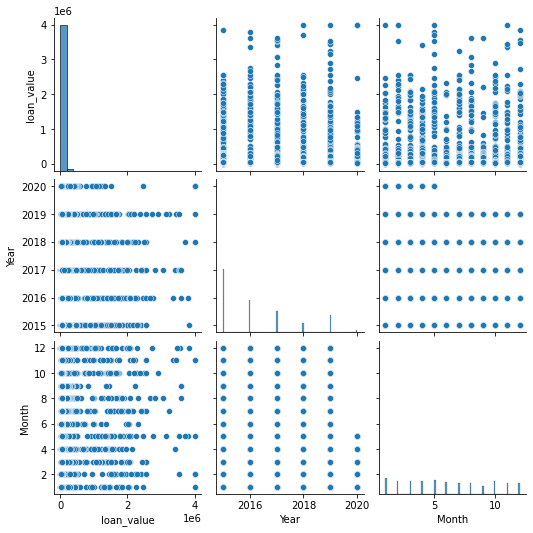

In [22]:
sns.pairplot(data=df1)

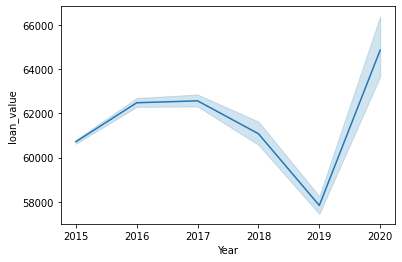

In [23]:
sns.lineplot(x=df1.Year,y= df1.loan_value)

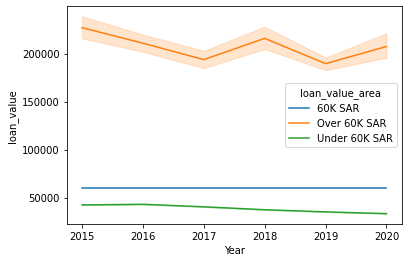

In [24]:
sns.lineplot(x=df1.Year,y=df1.loan_value,hue=df1.loan_value_area)#Average loan by categories in the five years

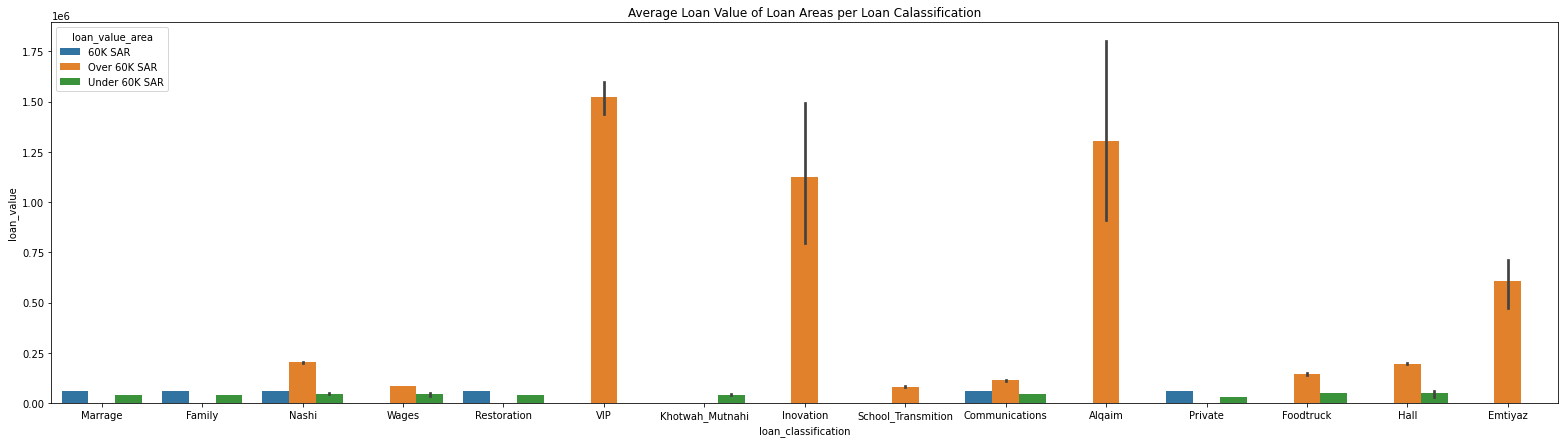

In [25]:
fig=plt.figure(figsize=(27,7))
plt.title('Average Loan Value of Loan Areas per Loan Calassification')
sns.barplot(y=df1.loan_value,x=df1.loan_classification,hue=df1.loan_value_area);

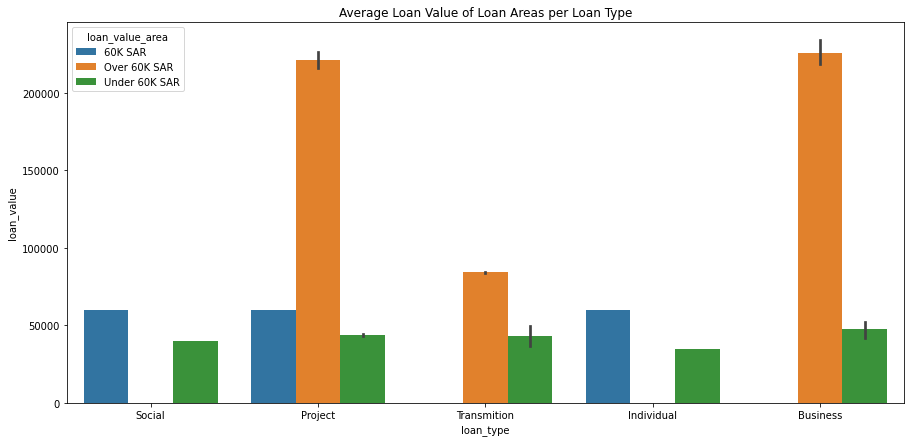

In [26]:
fig=plt.figure(figsize=(15,7))
plt.title('Average Loan Value of Loan Areas per Loan Type')
sns.barplot(y=df1.loan_value,x=df1.loan_type,hue=df1.loan_value_area);

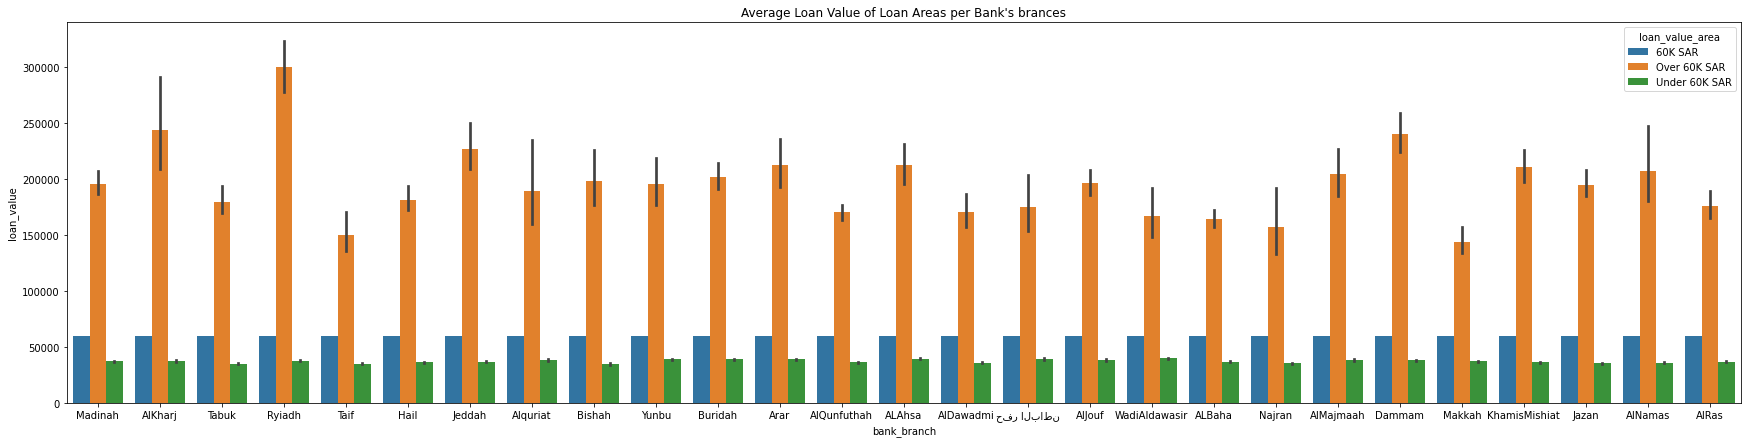

In [27]:
fig=plt.figure(figsize=(30,7))
plt.title("Average Loan Value of Loan Areas per Bank's brances")
sns.barplot(y=df1.loan_value,x=df1.bank_branch,hue=df1.loan_value_area);

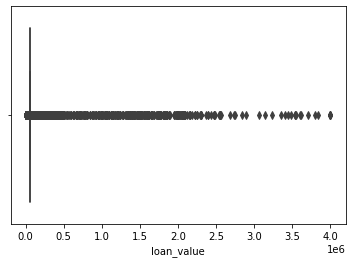

In [28]:
sns.boxplot(x=df1.loan_value)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


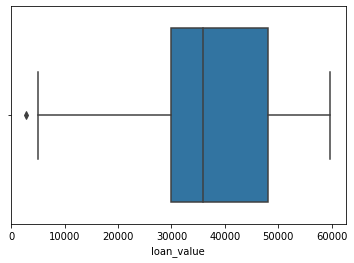

In [29]:
sns.boxplot(df1[df1.loan_value_area=='Under 60K SAR'].loan_value);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


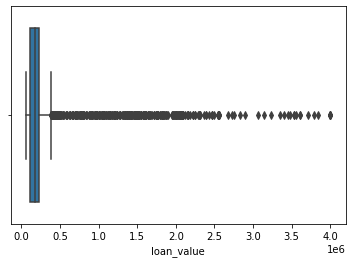

In [30]:
sns.boxplot(df1[df1.loan_value_area=='Over 60K SAR'].loan_value);

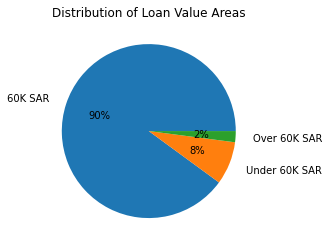

In [31]:
plt.title('Distribution of Loan Value Areas')
label=['60K SAR','Under 60K SAR','Over 60K SAR']
plt.pie(df1.loan_value_area.value_counts(), labels=label, autopct='%1.0f%%', labeldistance=1.2);


Text(0, 0.5, 'Distribution')

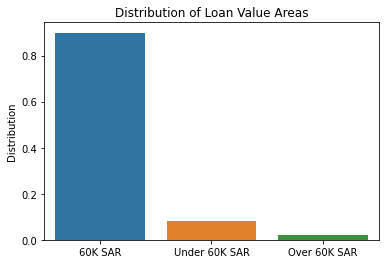

In [32]:
plt.title('Distribution of Loan Value Areas')
sns.barplot(x=label,y=df1.loan_value_area.value_counts(normalize=True))
plt.xlabel('Loan Value Area')
plt.ylabel('Distribution');

##Data Prepration

###Adding a New Feature

In [33]:
df.loc[df.loan_value==60000,'descriptive_loan_value']='60K SAR'
df.loc[df.loan_value>60000,'descriptive_loan_value']='Over 60K SAR'
df.loc[df.loan_value<60000,'descriptive_loan_value']='Under 60K SAR'

In [34]:
df

,bank_branch,loan_type,loan_classification,customer_sector,loan_value,installment,gender,age,social_status,special_needs,family_members,saving_loan,income_value,Year,Month,descriptive_loan_value
0,Madinah,Social,Marrage,Govrenmental_Company_Employee,60000.0,>= 1000,MALE,>= 30,Married,No,>= 02,No,>= 5000,2015,1,60K SAR
1,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,>= 30,Married,Yes,>= 02,No,>= 5000,2015,1,60K SAR
2,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,< 30,Married,No,>= 02,No,< 5000,2015,6,60K SAR
3,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,< 30,Married,No,>= 02,No,>= 10000,2015,6,60K SAR
4,Madinah,Social,Family,NaN,60000.0,< 1000,FEMALE,>= 40,Widower,No,>= 05,No,< 5000,2015,6,60K SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736678,Hail,Individual,Private,Undefined,30000.0,< 1000,FEMALE,< 30,Divorced,No,< 02,No,< 5000,2020,2,Under 60K SAR
736679,KhamisMishiat,Individual,Marrage,Undefined,60000.0,>= 1000,MALE,< 30,Married,No,>= 02,No,< 5000,2020,1,60K SAR
736680,Jeddah,Individual,Marrage,Govrenment_Employee,60000.0,>= 1000,MALE,< 30,Married,No,>= 02,No,>= 10000,2020,1,60K SAR
736681,AlMajmaah,Individual,Marrage,Undefined,60000.0,>= 1000,MALE,>= 30,Married,No,>= 02,Yes,< 5000,2020,1,60K SAR


###Data Cleansing

Filling Nulls in Customer Sectors with "Undifined"

In [35]:
df.customer_sector.fillna('Undefined',inplace=True)

Filling Nulls in Age, Family Members and Income Value with the most frecuent value

In [36]:
df.age.fillna(fage,inplace=True)

In [37]:
df.family_members.fillna(ffamily,inplace=True)

In [38]:
df.income_value.fillna(fincome,inplace=True)

Checking Nulls

In [39]:
df.isnull().sum()

bank_branch               0
loan_type                 0
loan_classification       0
customer_sector           0
loan_value                0
installment               0
gender                    0
age                       0
social_status             0
special_needs             0
family_members            0
saving_loan               0
income_value              0
Year                      0
Month                     0
descriptive_loan_value    0
dtype: int64

Correcting a bank branch Arabic value

In [40]:
df['bank_branch']=df.bank_branch.replace('حفر الباطن','HafarAlbatin')

In [41]:
df

,bank_branch,loan_type,loan_classification,customer_sector,loan_value,installment,gender,age,social_status,special_needs,family_members,saving_loan,income_value,Year,Month,descriptive_loan_value
0,Madinah,Social,Marrage,Govrenmental_Company_Employee,60000.0,>= 1000,MALE,>= 30,Married,No,>= 02,No,>= 5000,2015,1,60K SAR
1,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,>= 30,Married,Yes,>= 02,No,>= 5000,2015,1,60K SAR
2,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,< 30,Married,No,>= 02,No,< 5000,2015,6,60K SAR
3,Madinah,Social,Marrage,Govrenment_Employee,60000.0,< 1000,MALE,< 30,Married,No,>= 02,No,>= 10000,2015,6,60K SAR
4,Madinah,Social,Family,Undefined,60000.0,< 1000,FEMALE,>= 40,Widower,No,>= 05,No,< 5000,2015,6,60K SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736678,Hail,Individual,Private,Undefined,30000.0,< 1000,FEMALE,< 30,Divorced,No,< 02,No,< 5000,2020,2,Under 60K SAR
736679,KhamisMishiat,Individual,Marrage,Undefined,60000.0,>= 1000,MALE,< 30,Married,No,>= 02,No,< 5000,2020,1,60K SAR
736680,Jeddah,Individual,Marrage,Govrenment_Employee,60000.0,>= 1000,MALE,< 30,Married,No,>= 02,No,>= 10000,2020,1,60K SAR
736681,AlMajmaah,Individual,Marrage,Undefined,60000.0,>= 1000,MALE,>= 30,Married,No,>= 02,Yes,< 5000,2020,1,60K SAR


###Sampling

####Sampling years individually

#####Year 2015

In [42]:
# Sampling DF where loan value = 60K
e60=df[(df.Year==2015)&(df.loan_value==60000)].sample(9000)

In [43]:
# Sampling DF where loan value > 60K
o60=df[(df.Year==2015)&(df.loan_value>60000)].sample(200)

In [44]:
# Sampling DF where loan value < 60K
u60=df[(df.Year==2015)&(df.loan_value<60000)].sample(800)

In [45]:
# Merging all Samples of year 2015
frames=[e60,o60,u60]
Syear2015=pd.concat(frames)

print("Dataframes are merged!")

Dataframes are merged!


#####Year 2016

In [46]:
# Sampling DF where loan value = 60K
e60=df[(df.Year==2016)&(df.loan_value==60000)].sample(9000)

In [47]:
# Sampling DF where loan value > 60K
o60=df[(df.Year==2016)&(df.loan_value>60000)].sample(200)

In [48]:
# Sampling DF where loan value < 60K
u60=df[(df.Year==2016)&(df.loan_value<60000)].sample(800)

In [49]:
# Merging all Samples of year 2016
frames=[e60,o60,u60]
Syear2016=pd.concat(frames)

print("Dataframes are merged!")

Dataframes are merged!


#####Year 2017

In [50]:
# Sampling DF where loan value = 60K
e60=df[(df.Year==2017)&(df.loan_value==60000)].sample(9000)

In [51]:
# Sampling DF where loan value > 60K
o60=df[(df.Year==2017)&(df.loan_value>60000)].sample(200)

In [52]:
# Sampling DF where loan value < 60K
u60=df[(df.Year==2017)&(df.loan_value<60000)].sample(800)

In [53]:
# Merging all Samples of year 2017
frames=[e60,o60,u60]
Syear2017=pd.concat(frames)

print("Dataframes are merged!")

Dataframes are merged!


#####Year 2018

In [54]:
# Sampling DF where loan value = 60K
e60=df[(df.Year==2018)&(df.loan_value==60000)].sample(9000)

In [55]:
# Sampling DF where loan value > 60K
o60=df[(df.Year==2018)&(df.loan_value>60000)].sample(200)

In [56]:
# Sampling DF where loan value < 60K
u60=df[(df.Year==2018)&(df.loan_value<60000)].sample(800)

In [57]:
# Merging all Samples of year 2018
frames=[e60,o60,u60]
Syear2018=pd.concat(frames)

print("Dataframes are merged!")

Dataframes are merged!


#####Year 2019

In [58]:
# Sampling DF where loan value = 60K
e60=df[(df.Year==2019)&(df.loan_value==60000)].sample(9000)

In [59]:
# Sampling DF where loan value > 60K
o60=df[(df.Year==2019)&(df.loan_value>60000)].sample(200)

In [60]:
# Sampling DF where loan value < 60K
u60=df[(df.Year==2019)&(df.loan_value<60000)].sample(800)

In [61]:
# Merging all Samples of year 2019
frames=[e60,o60,u60]
Syear2019=pd.concat(frames)

print("Dataframes are merged!")

Dataframes are merged!


#####Year 2020

In [62]:
# Sampling DF where loan value = 60K
# e60=df[(df.Year==2020)&(df.loan_value==60000)].sample(9000)['loan_value']

In [63]:
# Sampling DF where loan value > 60K
# o60=df[(df.Year==2020)&(df.loan_value>60000)].sample(200)['loan_value']

In [64]:
# Sampling DF where loan value < 60K
# u60=df[(df.Year==2020)&(df.loan_value<60000)].sample(800)['loan_value']

In [65]:
# Merging all Samples of year 2020
# frames=[e60,o60,u60]
# Syear2020=pd.concat(frames)

# print("Dataframes are merged!")

####Merging all samples

In [66]:
frames=[Syear2015,Syear2016,Syear2017,Syear2018,Syear2019]# Execluding Syear2020 as it will be unseen data. Note: You should delete Syear2020.loan_value later
dfs=pd.concat(frames)
print("Samples are merged!")

Samples are merged!


In [67]:
dfs

,bank_branch,loan_type,loan_classification,customer_sector,loan_value,installment,gender,age,social_status,special_needs,family_members,saving_loan,income_value,Year,Month,descriptive_loan_value
266671,ALBaha,Social,Family,Govrenment_Employee,60000.0,< 1000,MALE,>= 30,Married,No,>= 05,No,< 5000,2015,9,60K SAR
70037,AlQunfuthah,Social,Family,Undefined,60000.0,< 1000,FEMALE,>= 40,Divorced,No,>= 02,No,< 5000,2015,1,60K SAR
122062,ALBaha,Social,Marrage,Govrenment_Employee,60000.0,>= 1000,MALE,< 30,Married,No,>= 10,No,>= 7500,2015,3,60K SAR
107980,Ryiadh,Social,Family,Undefined,60000.0,< 1000,MALE,>= 60,Married,Yes,>= 05,No,< 5000,2015,3,60K SAR
126074,Najran,Social,Marrage,Private_Sector_Employee,60000.0,< 1000,MALE,>= 30,Married,No,>= 02,No,< 5000,2015,4,60K SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676999,Jeddah,Individual,Private,Undefined,30000.0,< 1000,FEMALE,>= 60,Widower,No,< 02,No,< 5000,2019,6,Under 60K SAR
695129,Ryiadh,Individual,Marrage,Undefined,18000.0,< 1000,MALE,>= 30,Married,No,>= 02,No,>= 10000,2019,12,Under 60K SAR
657728,AlDawadmi,Individual,Restoration,Undefined,54000.0,< 1000,FEMALE,>= 60,Widower,Yes,>= 05,No,< 5000,2019,11,Under 60K SAR
673396,Jazan,Individual,Marrage,Govrenment_Employee,48000.0,< 1000,MALE,< 30,Married,No,>= 02,Yes,>= 7500,2019,10,Under 60K SAR


####Deleting Loan Value and Installment features as it would cause a data leakage in modeling

In [68]:
del df['loan_value']
del df['installment']
del dfs['loan_value']
del dfs['installment']

Checking the deleted feature

In [69]:
df.columns

Index(['bank_branch', 'loan_type', 'loan_classification', 'customer_sector',
       'gender', 'age', 'social_status', 'special_needs', 'family_members',
       'saving_loan', 'income_value', 'Year', 'Month',
       'descriptive_loan_value'],
      dtype='object')

In [70]:
dfs.columns

Index(['bank_branch', 'loan_type', 'loan_classification', 'customer_sector',
       'gender', 'age', 'social_status', 'special_needs', 'family_members',
       'saving_loan', 'income_value', 'Year', 'Month',
       'descriptive_loan_value'],
      dtype='object')

In [71]:
df

,bank_branch,loan_type,loan_classification,customer_sector,gender,age,social_status,special_needs,family_members,saving_loan,income_value,Year,Month,descriptive_loan_value
0,Madinah,Social,Marrage,Govrenmental_Company_Employee,MALE,>= 30,Married,No,>= 02,No,>= 5000,2015,1,60K SAR
1,Madinah,Social,Marrage,Govrenment_Employee,MALE,>= 30,Married,Yes,>= 02,No,>= 5000,2015,1,60K SAR
2,Madinah,Social,Marrage,Govrenment_Employee,MALE,< 30,Married,No,>= 02,No,< 5000,2015,6,60K SAR
3,Madinah,Social,Marrage,Govrenment_Employee,MALE,< 30,Married,No,>= 02,No,>= 10000,2015,6,60K SAR
4,Madinah,Social,Family,Undefined,FEMALE,>= 40,Widower,No,>= 05,No,< 5000,2015,6,60K SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736678,Hail,Individual,Private,Undefined,FEMALE,< 30,Divorced,No,< 02,No,< 5000,2020,2,Under 60K SAR
736679,KhamisMishiat,Individual,Marrage,Undefined,MALE,< 30,Married,No,>= 02,No,< 5000,2020,1,60K SAR
736680,Jeddah,Individual,Marrage,Govrenment_Employee,MALE,< 30,Married,No,>= 02,No,>= 10000,2020,1,60K SAR
736681,AlMajmaah,Individual,Marrage,Undefined,MALE,>= 30,Married,No,>= 02,Yes,< 5000,2020,1,60K SAR


###Spliting & Encoding Data

####Spliting & Encoding Sample Data

In [72]:
pip install category_encoders

In [73]:

dfstrain=pd.DataFrame(dfs[(dfs['Year']<2019)])
dfstest=pd.DataFrame(dfs[(dfs['Year']==2019) ])

col=['descriptive_loan_value']

X_train=dfstrain.drop(columns=col)
y_train=dfstrain.descriptive_loan_value

X_test=dfstest.drop(columns=col)
y_test=dfstest.descriptive_loan_value

#Encoding the data

import category_encoders as ce

# Ordinally Encoded  
encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)



# X_train=pd.get_dummies(X_train)
# X_test=pd.get_dummies(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [74]:
dfstrain.columns

Index(['bank_branch', 'loan_type', 'loan_classification', 'customer_sector',
       'gender', 'age', 'social_status', 'special_needs', 'family_members',
       'saving_loan', 'income_value', 'Year', 'Month',
       'descriptive_loan_value'],
      dtype='object')

#### Spliting & Encoding The Main Data Excluding Year 2020 (This is a latest step which will be taken after getting the right model using the sample data)

In [75]:
dftrain=pd.DataFrame(df[(df['Year']<2019)])
dftest=pd.DataFrame(df[(df['Year']==2019)])# | (df['Year']==2020)

col=['descriptive_loan_value']

X_trainM=dftrain.drop(columns=col)
y_trainM=dftrain.descriptive_loan_value

X_testM=dftest.drop(columns=col)
y_testM=dftest.descriptive_loan_value

#Encoding the data

# import category_encoders as ce

# Ordinally Encoded  
encoderM = ce.OrdinalEncoder()
X_trainM = encoderM.fit_transform(X_trainM)
X_testM=encoderM.transform(X_testM)



# X_train=pd.get_dummies(X_train)
# X_test=pd.get_dummies(X_test)

#### Spliting & Encoding The Main Data Including Year 2020

In [76]:
dftrainAll=pd.DataFrame(df[(df['Year']<2020)])
dftestAll=pd.DataFrame(df[(df['Year']==2020)])

col=['descriptive_loan_value']

X_trainAll=dftrainAll.drop(columns=col)
y_trainAll=dftrainAll.descriptive_loan_value

X_testAll=dftestAll.drop(columns=col)
y_testAll=dftestAll.descriptive_loan_value

#Encoding the data

# import category_encoders as ce

# Ordinally Encoded  
encoderAll = ce.OrdinalEncoder()
X_trainAll = encoderAll.fit_transform(X_trainAll)
X_testAll=encoderAll.transform(X_testAll)



# X_train=pd.get_dummies(X_train)
# X_test=pd.get_dummies(X_test)

In [77]:
dftestAll.descriptive_loan_value.value_counts()

60K SAR          8273
Under 60K SAR    4380
Over 60K SAR     1255
Name: descriptive_loan_value, dtype: int64

In [78]:
dftestAll.shape

(13908, 14)

##Modeling

####Baseline

#####Creating the model

In [79]:
y_train.value_counts(normalize=True)[0]

0.9

####Logistic Regression Model

#####Creating the model

In [80]:

lr=LogisticRegression(fit_intercept=True,
                      max_iter=10000)


In [81]:
%time
lr.fit(X_train, y_train)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
pred=lr.predict(X_test)

#####Evaluating the model

In [83]:
accuracy_score(y_test,pred)

0.926

In [84]:
classification_report(y_test,pred)

'               precision    recall  f1-score   support\n\n      60K SAR       0.95      0.99      0.97      9000\n Over 60K SAR       1.00      0.01      0.01       200\nUnder 60K SAR       0.55      0.44      0.49       800\n\n     accuracy                           0.93     10000\n    macro avg       0.83      0.48      0.49     10000\n weighted avg       0.92      0.93      0.91     10000\n'

#####Model Optimization

######GridSearch

In [85]:
# param_grid = {
#     'fit_intercept': [True,False],
#     'penalty': ['l1', 'l2'],
#     'C': np.logspace(-4, 4, 20),
#     'max_iter':[1000,10000]}
    

# grid = GridSearchCV(lr, param_grid = param_grid, cv = 5, n_jobs=-1)

In [86]:
# grid.fit(X_train, y_train)

In [87]:
# grid.best_params_

Optimized Model

In [88]:
lr=LogisticRegression(fit_intercept=False,
                      max_iter=10000,
                      C=29.763514416313132,
                      penalty= 'l2')


In [89]:
lr.fit(X_train, y_train)

LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [90]:
pred=lr.predict(X_test)

In [91]:
accuracy_score(y_test,pred)

0.9247

####Random Forest Model

#####Creating the model

In [92]:

rf = RandomForestClassifier()


In [93]:

rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
predrf=rf.predict(X_test)

In [95]:
rf.feature_importances_

array([0.20446967, 0.09619114, 0.22063388, 0.04051858, 0.01228565,
       0.04022859, 0.03871352, 0.01016351, 0.07367776, 0.00064489,
       0.0515947 , 0.07256037, 0.13831775])

In [96]:
X_train.columns

Index(['bank_branch', 'loan_type', 'loan_classification', 'customer_sector',
       'gender', 'age', 'social_status', 'special_needs', 'family_members',
       'saving_loan', 'income_value', 'Year', 'Month'],
      dtype='object')

#####Evaluating the model

In [97]:
accuracy_score(y_test,predrf)

0.9283

In [98]:
classification_report(y_test,predrf)

'               precision    recall  f1-score   support\n\n      60K SAR       0.94      0.99      0.97      9000\n Over 60K SAR       1.00      0.23      0.37       200\nUnder 60K SAR       0.63      0.42      0.50       800\n\n     accuracy                           0.93     10000\n    macro avg       0.86      0.55      0.62     10000\n weighted avg       0.92      0.93      0.92     10000\n'

#####Model Optimization

######GridSearch

In [99]:
# param_gridrf = {
#     'n_estimators' : list(range(100,300,10)),
#     'warm_start' : [False, True],
#     'random_state':list(range(10,51,10))
    
    
#     }

# gridrf = GridSearchCV(rf, param_grid = param_gridrf, cv = 5, n_jobs=-1)

In [100]:
# gridrf.fit(X_train, y_train)

In [101]:
# gridrf.best_params_

In [102]:
# best=gridrf.best_params_
# print(best)

Optimized Model

In [103]:
rf = RandomForestClassifier(n_estimators= 160, warm_start= False,random_state=300)

In [104]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=300,
                       verbose=0, warm_start=False)

In [105]:
predrf=rf.predict(X_test)

In [106]:
accuracy_score(y_test,predrf)

0.9298

###Modeling Main Data

####Baseline

#####Creating the model

In [107]:

y_trainAll.value_counts(normalize=True)[0]


0.905302480024904

####Logistic Regression Model

#####Creating the model

In [108]:

lrAll=LogisticRegression(fit_intercept=False,
                      max_iter=10000,
                      C=29.763514416313132,
                      penalty= 'l2')


In [109]:
lrAll.fit(X_trainAll, y_trainAll)


LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [110]:
predlrAll=lrAll.predict(X_testAll)

#####Evaluating the model

Accuracy Score

In [111]:
lrAll_acc=accuracy_score(y_testAll,predlrAll)
print('Logistic Model Accurecy Score = ' , lrAll_acc)

Logistic Model Accurecy Score =  0.7638769053781996


Confusion Matrix

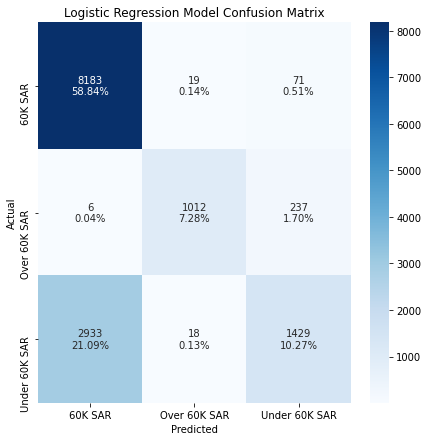

In [112]:
cf = confusion_matrix(y_testAll, predlrAll)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ticks_labels = df.descriptive_loan_value.unique()

plt.figure(figsize=(7,7))
sns.heatmap(cf, annot=labels, fmt='', cmap=plt.cm.Blues, yticklabels=ticks_labels, xticklabels= ticks_labels);
plt.title("Logistic Regression Model Confusion Matrix")

plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.set(font_scale=1);

####Random Forest Model

#####Creating the model

In [113]:

rfAll =RandomForestClassifier(n_estimators= 160, warm_start= False,random_state=300)

In [114]:

rfAll.fit(X_trainAll, y_trainAll)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=300,
                       verbose=0, warm_start=False)

In [115]:
predrfAll=rfAll.predict(X_testAll)

#####Evaluating the model

Accuracy Score

In [116]:
rfAll_acc=accuracy_score(y_testAll,predrfAll)
print('Random Forest Model Accurecy Score = ' , rfAll_acc)

Random Forest Model Accurecy Score =  0.7678314639056658


In [117]:
classification_report(y_testAll,predrfAll)

'               precision    recall  f1-score   support\n\n      60K SAR       0.74      0.93      0.83      8273\n Over 60K SAR       1.00      1.00      1.00      1255\nUnder 60K SAR       0.76      0.39      0.51      4380\n\n     accuracy                           0.77     13908\n    macro avg       0.83      0.77      0.78     13908\n weighted avg       0.77      0.77      0.74     13908\n'

Confusion Matrix

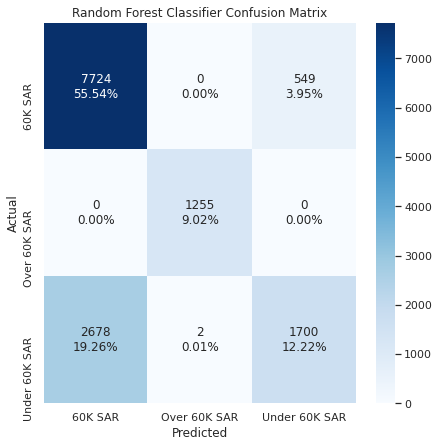

In [118]:
cf = confusion_matrix(y_testAll, predrfAll)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ticks_labels = df.descriptive_loan_value.unique()

plt.figure(figsize=(7,7))
sns.heatmap(cf, annot=labels, fmt='', cmap=plt.cm.Blues, yticklabels=ticks_labels, xticklabels= ticks_labels);
plt.title("Random Forest Classifier Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);